In [1]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [11]:
us30_tickers = [
    "MMM", "AXP", "AMGN", "AAPL", "BA", "CAT", "CVX", "CSCO", "KO", "DIS",
    "DOW", "GS", "HD", "HON", "IBM", "INTC", "JNJ", "JPM", "MCD", "MRK",
    "MSFT", "NKE", "PG", "CRM", "TRV", "UNH", "VZ", "V", "WMT"
]



In [12]:
data = yf.download(us30_tickers, start="2020-01-01", )
data = data[['Close']]

/tmp/ipython-input-3834575076.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(us30_tickers, start="2020-01-01", )
[*********************100%***********************]  29 of 29 completed


In [13]:
ticker_name = {
    "AAPL": "Apple Inc.",
    "AMGN": "Amgen Inc.",
    "AXP": "American Express",
    "BA": "Boeing Co.",
    "CAT": "Caterpillar Inc.",
    "CSCO": "Cisco Systems",
    "CVX": "Chevron Corp.",
    "DIS": "Walt Disney",
    "DOW": "Dow Inc.",
    "GS": "Goldman Sachs",
    "HD": "Home Depot",
    "HON": "Honeywell",
    "IBM": "IBM Corp.",
    "INTC": "Intel Corp.",
    "JNJ": "Johnson & Johnson",
    "JPM": "JPMorgan Chase",
    "KO": "Coca-Cola",
    "MCD": "McDonald's",
    "MMM": "3M Company",
    "MRK": "Merck & Co.",
    "MSFT": "Microsoft",
    "NKE": "Nike",
    "PG": "Procter & Gamble",
    "CRM": "Salesforce",
    "TRV": "Travelers Companies",
    "V": "Visa Inc.",
    "VZ": "Verizon",
    "WMT": "Walmart",
    "RTX": "RTX Corporation"
}


In [14]:
data.rename(ticker_name, axis=1, inplace=True)

In [15]:
data.head()

Price           Close                                           \
Ticker     Apple Inc.  Amgen Inc. American Express  Boeing Co.   
Date                                                             
2020-01-02  72.468269  199.607407       116.380028  331.348572   
2020-01-03  71.763725  198.252319       115.224106  330.791901   
2020-01-06  72.335556  199.773666       114.724731  331.766083   
2020-01-07  71.995377  197.894836       114.123634  335.285156   
2020-01-08  73.153488  198.044449       116.093376  329.410095   

Price                                                                \
Ticker     Caterpillar Inc.  Salesforce Cisco Systems Chevron Corp.   
Date                                                                  
2020-01-02       132.874954  164.985382     40.472332     92.917870   
2020-01-03       131.030029  164.175217     39.812012     92.596504   
2020-01-06       130.941757  171.367844     39.954109     92.282768   
2020-01-07       129.211655  173.887222     39.695004     91.104370   
2020-01-08       130.359192  175.201263     39.720070     90.063690   

Price                              ...                                      \
Ticker     Walt Disney   Dow Inc.  ...  3M Company Merck & Co.   Microsoft   
Date                               ...                                       
2020-01-02  144.790268  38.489639  ...  120.682526   72.627342  152.505692   
2020-01-03  143.129395  37.537243  ...  119.643295   72.003952  150.606750   
2020-01-06  142.298935  37.386860  ...  119.757263   72.311722  150.996002   
2020-01-07  142.347778  37.372543  ...  119.274544   70.386330  149.619247   
2020-01-08  142.054703  37.759224  ...  121.104904   69.912910  152.002472   

Price                                                                   \
Ticker           Nike Procter & Gamble Travelers Companies         UNH   
Date                                                                     
2020-01-02  94.273270       106.273247          121.050354  265.243073   
2020-01-03  94.014992       105.558487          120.619034  262.558899   
2020-01-06  93.932014       105.704880          120.751045  264.381531   
2020-01-07  93.885857       105.050430          118.981674  262.785583   
2020-01-08  93.673683       105.498222          120.258080  268.326233   

Price                                         
Ticker       Visa Inc.    Verizon    Walmart  
Date                                          
2020-01-02  183.186249  42.610210  36.433838  
2020-01-03  181.729309  42.156544  36.112198  
2020-01-06  181.336349  42.065811  36.038677  
2020-01-07  180.857086  41.598175  35.704784  
2020-01-08  183.953049  41.674950  35.582264  

[5 rows x 29 columns]

In [16]:
data.columns = [f"{col[0]}_{col[1]}" for col in data.columns]

In [17]:
data = data.reset_index()


In [18]:
data.set_index('Date', inplace=True)

In [19]:
data.head()

,Close_Apple Inc.,Close_Amgen Inc.,Close_American Express,Close_Boeing Co.,Close_Caterpillar Inc.,Close_Salesforce,Close_Cisco Systems,Close_Chevron Corp.,Close_Walt Disney,Close_Dow Inc.,...,Close_3M Company,Close_Merck & Co.,Close_Microsoft,Close_Nike,Close_Procter & Gamble,Close_Travelers Companies,Close_UNH,Close_Visa Inc.,Close_Verizon,Close_Walmart
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,72.468269,199.607407,116.380028,331.348572,132.874954,164.985382,40.472332,92.917870,144.790268,38.489639,...,120.682526,72.627342,152.505692,94.273270,106.273247,121.050354,265.243073,183.186249,42.610210,36.433838
2020-01-03,71.763725,198.252319,115.224106,330.791901,131.030029,164.175217,39.812012,92.596504,143.129395,37.537243,...,119.643295,72.003952,150.606750,94.014992,105.558487,120.619034,262.558899,181.729309,42.156544,36.112198
2020-01-06,72.335556,199.773666,114.724731,331.766083,130.941757,171.367844,39.954109,92.282768,142.298935,37.386860,...,119.757263,72.311722,150.996002,93.932014,105.704880,120.751045,264.381531,181.336349,42.065811,36.038677
2020-01-07,71.995377,197.894836,114.123634,335.285156,129.211655,173.887222,39.695004,91.104370,142.347778,37.372543,...,119.274544,70.386330,149.619247,93.885857,105.050430,118.981674,262.785583,180.857086,41.598175,35.704784
2020-01-08,73.153488,198.044449,116.093376,329.410095,130.359192,175.201263,39.720070,90.063690,142.054703,37.759224,...,121.104904,69.912910,152.002472,93.673683,105.498222,120.258080,268.326233,183.953049,41.674950,35.582264


In [20]:
data = data.pct_change().dropna()

In [21]:
data.head()

,Close_Apple Inc.,Close_Amgen Inc.,Close_American Express,Close_Boeing Co.,Close_Caterpillar Inc.,Close_Salesforce,Close_Cisco Systems,Close_Chevron Corp.,Close_Walt Disney,Close_Dow Inc.,...,Close_3M Company,Close_Merck & Co.,Close_Microsoft,Close_Nike,Close_Procter & Gamble,Close_Travelers Companies,Close_UNH,Close_Visa Inc.,Close_Verizon,Close_Walmart
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,-0.009722,-0.006789,-0.009932,-0.001680,-0.013885,-0.004911,-0.016315,-0.003459,-0.011471,-0.024744,...,-0.008611,-0.008583,-0.012452,-0.002740,-0.006726,-0.003563,-0.010120,-0.007953,-0.010647,-0.008828
2020-01-06,0.007968,0.007674,-0.004334,0.002945,-0.000674,0.043811,0.003569,-0.003388,-0.005802,-0.004006,...,0.000953,0.004274,0.002585,-0.000883,0.001387,0.001094,0.006942,-0.002162,-0.002152,-0.002036
2020-01-07,-0.004703,-0.009405,-0.005239,0.010607,-0.013213,0.014702,-0.006485,-0.012769,0.000343,-0.000383,...,-0.004031,-0.026626,-0.009118,-0.000491,-0.006191,-0.014653,-0.006037,-0.002643,-0.011117,-0.009265
2020-01-08,0.016086,0.000756,0.017260,-0.017523,0.008881,0.007557,0.000631,-0.011423,-0.002059,0.010347,...,0.015346,-0.006726,0.015929,-0.002260,0.004263,0.010728,0.021084,0.017118,0.001846,-0.003431
2020-01-09,0.021241,0.002980,0.018082,0.014998,-0.002505,0.012801,-0.004209,-0.001614,-0.003920,-0.010241,...,0.003156,0.008803,0.012493,-0.000689,0.010938,0.007393,-0.005677,0.006930,-0.004146,0.010330


<Axes: xlabel='Date'>

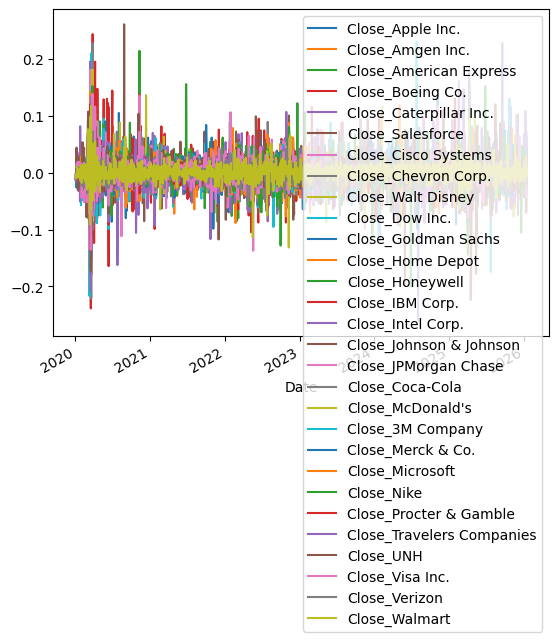

In [22]:
data.plot()

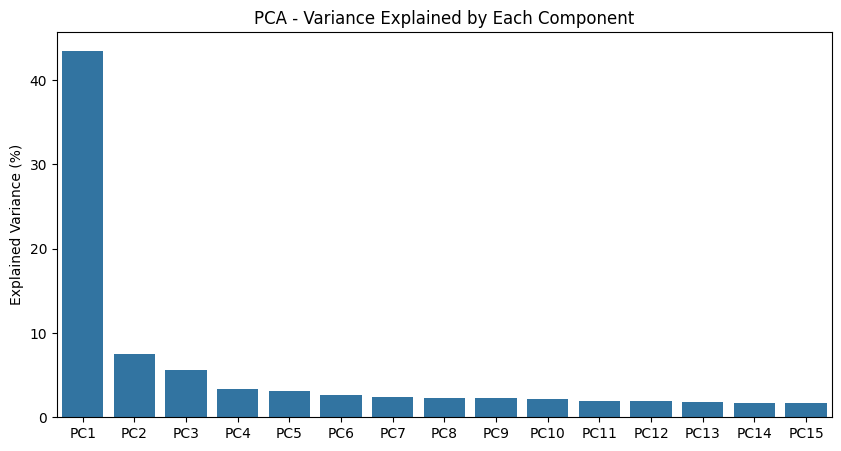

In [23]:


# Standardize the features
scaler = StandardScaler()
d_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=15)
X_pca = pca.fit_transform(d_scaled)

# Explained variance plot
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(15)], y=pca.explained_variance_ratio_ * 100)
plt.ylabel("Explained Variance (%)")
plt.title("PCA - Variance Explained by Each Component")
plt.show()

In [24]:
pca.components_.shape

(15, 29)

In [25]:
pc_df = pd.DataFrame(pca.components_[:4], columns=data.columns, index=["PC1", "PC2","PC3","PC4"]).T

# Sort by absolute contribution to PC1 and PC2
top_pc1 = pc_df["PC1"].abs().sort_values(ascending=False).head(10)
top_pc2 = pc_df["PC2"].abs().sort_values(ascending=False).head(10)
top_pc3 = pc_df["PC3"].abs().sort_values(ascending=False).head(10)
top_pc4 = pc_df["PC4"].abs().sort_values(ascending=False).head(10)


print(" Top 10 Features Contributing to PC1:")
print(top_pc1)

print("\n Top 10 Features Contributing to PC2:")
print(top_pc2)

print("\n Top 10 Features Contributing to PC3:")
print(top_pc3)

print("\n Top 10 Features Contributing to PC4:")
print(top_pc4)



 Top 10 Features Contributing to PC1:
Close_Honeywell           0.227682
Close_American Express    0.223291
Close_Visa Inc.           0.222719
Close_JPMorgan Chase      0.222574
Close_Goldman Sachs       0.220851
Close_Home Depot          0.204521
Close_Cisco Systems       0.201423
Close_Dow Inc.            0.197167
Close_McDonald's          0.195502
Close_Coca-Cola           0.194404
Name: PC1, dtype: float64

 Top 10 Features Contributing to PC2:
Close_Procter & Gamble     0.382051
Close_Johnson & Johnson    0.363183
Close_Merck & Co.          0.300642
Close_Amgen Inc.           0.283584
Close_Verizon              0.255785
Close_Walmart              0.232437
Close_Coca-Cola            0.231753
Close_Boeing Co.           0.231518
Close_American Express     0.224320
Close_Goldman Sachs        0.219182
Name: PC2, dtype: float64

 Top 10 Features Contributing to PC3:
Close_Microsoft              0.438574
Close_Salesforce             0.416741
Close_Apple Inc.             0.381795
Close_Ch

In [26]:
corr_matrix = data.corr().abs()

In [27]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [28]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [29]:
dow_jones_filter = data.drop(columns=to_drop)

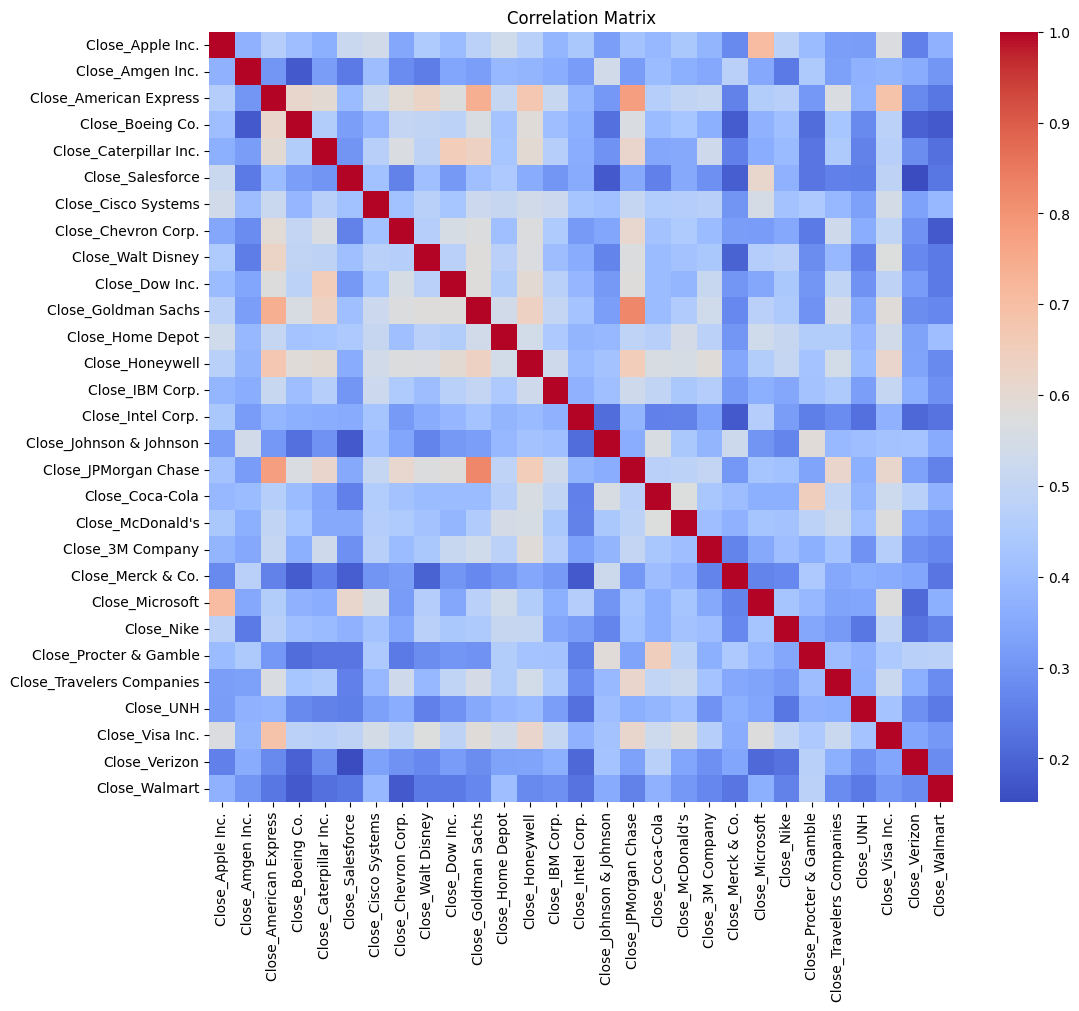

In [30]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [31]:
data2=dow_jones_filter.corr().abs()

In [32]:
data2.head()

,Close_Apple Inc.,Close_Amgen Inc.,Close_American Express,Close_Boeing Co.,Close_Caterpillar Inc.,Close_Salesforce,Close_Cisco Systems,Close_Chevron Corp.,Close_Walt Disney,Close_Dow Inc.,...,Close_3M Company,Close_Merck & Co.,Close_Microsoft,Close_Nike,Close_Procter & Gamble,Close_Travelers Companies,Close_UNH,Close_Visa Inc.,Close_Verizon,Close_Walmart
Close_Apple Inc.,1.000000,0.370058,0.461987,0.407288,0.366102,0.518004,0.539581,0.342563,0.447838,0.400558,...,0.379835,0.278138,0.707277,0.478219,0.397433,0.322629,0.319509,0.568321,0.255068,0.369565
Close_Amgen Inc.,0.370058,1.000000,0.301471,0.181070,0.319472,0.243350,0.401149,0.279456,0.249175,0.338412,...,0.346711,0.473931,0.347432,0.244744,0.446437,0.327088,0.373798,0.378808,0.356503,0.302290
Close_American Express,0.461987,0.301471,1.000000,0.612863,0.597990,0.397511,0.517504,0.594948,0.626798,0.577346,...,0.506284,0.260896,0.459923,0.468671,0.305889,0.563115,0.377228,0.688121,0.276487,0.237189
Close_Boeing Co.,0.407288,0.181070,0.612863,1.000000,0.459148,0.323333,0.386218,0.503030,0.496638,0.481590,...,0.363624,0.184694,0.368322,0.408370,0.216992,0.428951,0.275950,0.478620,0.194400,0.179551
Close_Caterpillar Inc.,0.366102,0.319472,0.597990,0.459148,1.000000,0.299747,0.467163,0.564821,0.484667,0.655200,...,0.532605,0.256471,0.359256,0.396618,0.234989,0.446169,0.260952,0.468146,0.283111,0.222421


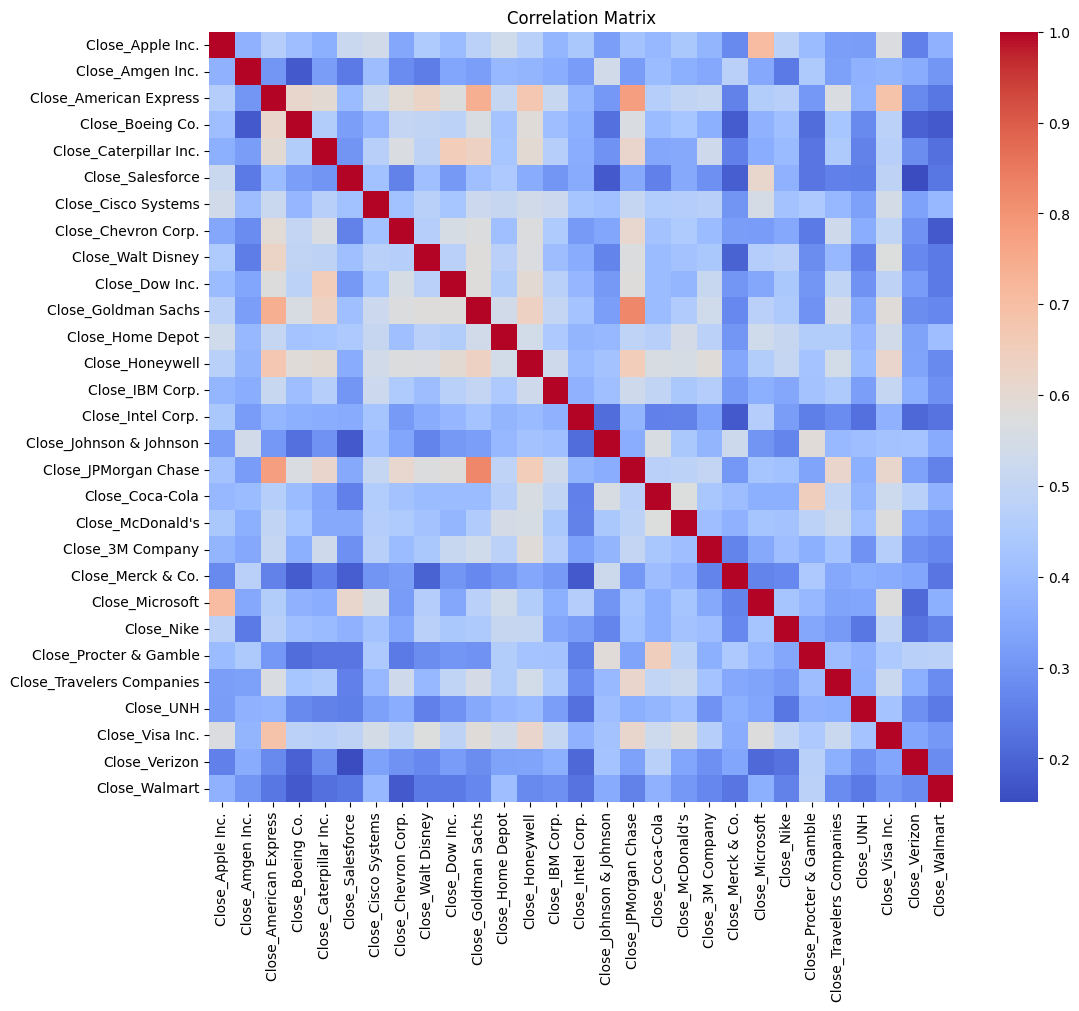

In [38]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data2, annot=False, cmap='coolwarm', ax=ax)
plt.title("Correlation Matrix")
plt.show()
